<a href="https://colab.research.google.com/github/VycheslavRussu/solar-power-forecasting/blob/main/Solar_Power_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',3)
generation_data = pd.read_csv('drive/MyDrive/data/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('drive/MyDrive/data/Plant_2_Weather_Sensor_Data.csv')
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

prediction = rfr.predict(X_test)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(50).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
43184,0.000000,0.000000,0.000000
15714,0.000000,0.000000,0.000000
36043,0.000000,0.000000,0.000000
21344,1095.360000,1094.722133,0.637867
47499,1144.693333,1145.030743,-0.337410
58865,0.000000,0.000000,0.000000
64911,380.607143,380.776505,-0.169362
35192,1122.026667,1121.802910,0.223757
25519,0.000000,0.000000,0.000000
29875,0.000000,0.000000,0.000000


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',3)

При запуске блока выше вылетела ошибка
```
OptionError                               Traceback (most recent call last)

<ipython-input-7-61ab38d4a7ab> in <cell line: 3>()
      1 pd.set_option('display.max_columns',None)
      2 pd.set_option('display.max_rows',None)
----> 3 pd.set_option('precision',3)

2 frames

/usr/local/lib/python3.10/dist-packages/pandas/_config/config.py in _get_single_key(pat, silent)
    121         raise OptionError(f"No such keys(s): {repr(pat)}")
    122     if len(keys) > 1:
--> 123         raise OptionError("Pattern matched multiple keys")
    124     key = keys[0]
    125

OptionError: Pattern matched multiple keys
```

Как я и говорил, тут используются старые конструкции (хотя в питоне старым можно считать уже двухнедельный код:D)


В данный момент в pandas надо использовать "display.precision" вместо "precision".

In [4]:
generation_data = pd.read_csv('drive/MyDrive/data/Plant_2_Generation_Data.csv')

In [5]:
weather_data = pd.read_csv('drive/MyDrive/data/Plant_2_Weather_Sensor_Data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

Загрузил файлы в колаб и прописал правильный путь

In [ ]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
33394,2020-06-01 17:30:00,4136001,oZZkBaNadn6DNKz,9.925000,9.575000,4327.916667,1708201381.916667
41436,2020-06-05 13:30:00,4136001,LlT2YUhhzqhg5Sw,0.000000,0.000000,1387.000000,282728669.000000
30430,2020-05-31 08:00:00,4136001,4UPUqMRk7TRMgml,272.385714,267.264286,246.428571,2546113.428571
30603,2020-05-31 09:45:00,4136001,vOuJvMaM2sgwLmb,750.453333,734.333333,1234.466667,2327924.466667
25673,2020-05-28 22:30:00,4136001,81aHJ1q11NBPMrL,0.000000,0.000000,8947.000000,1215372608.000000


In [ ]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1293,2020-05-28 11:45:00,4136001,iq8k7ZNt4Mwm3w0,33.304609,55.940556,0.937421
2155,2020-06-06 12:00:00,4136001,iq8k7ZNt4Mwm3w0,31.962851,47.906496,0.767899
997,2020-05-25 09:45:00,4136001,iq8k7ZNt4Mwm3w0,30.640335,47.746360,0.746754
890,2020-05-24 07:00:00,4136001,iq8k7ZNt4Mwm3w0,26.308292,27.890579,0.154066
45,2020-05-15 11:15:00,4136001,iq8k7ZNt4Mwm3w0,34.251795,54.894302,0.970448


In [6]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%Y-%m-%d %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

In [7]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
56475,2020-06-12 16:15:00,vOuJvMaM2sgwLmb,241.980000,237.486667,4377.266667,2397322.266667,27.815860,32.435735,0.157751
8473,2020-05-19 00:30:00,Et9kgGMDl729KT4,0.000000,0.000000,0.000000,1721810.000000,25.661358,24.373651,0.000000
64063,2020-06-16 06:30:00,q49J1IKaHRwDQnt,71.857143,69.642857,10.000000,511335.000000,24.453495,24.644801,0.050842
14819,2020-05-22 15:45:00,81aHJ1q11NBPMrL,760.780000,744.820000,2373.133333,1215317203.133333,36.516238,50.825681,0.513763
18598,2020-05-24 20:15:00,4UPUqMRk7TRMgml,0.000000,0.000000,4635.000000,2497601.000000,31.093900,29.804958,0.000000


In [8]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [ ]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [ ]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
std,370.569597,362.112118,2919.448386,729667771.073241,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,16.764084,415.672274
min,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,30.000000,720.000000
75%,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,45.000000,1080.000000
max,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


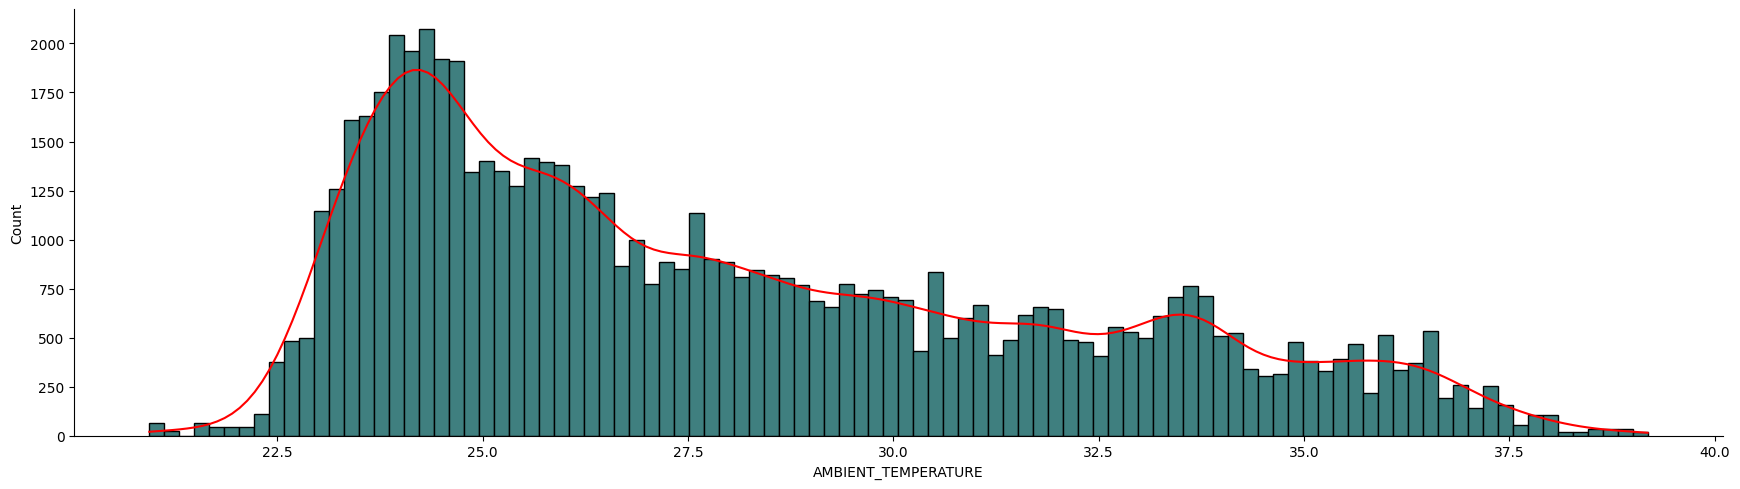

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [ ]:
df_solar['DATE'].nunique()

34

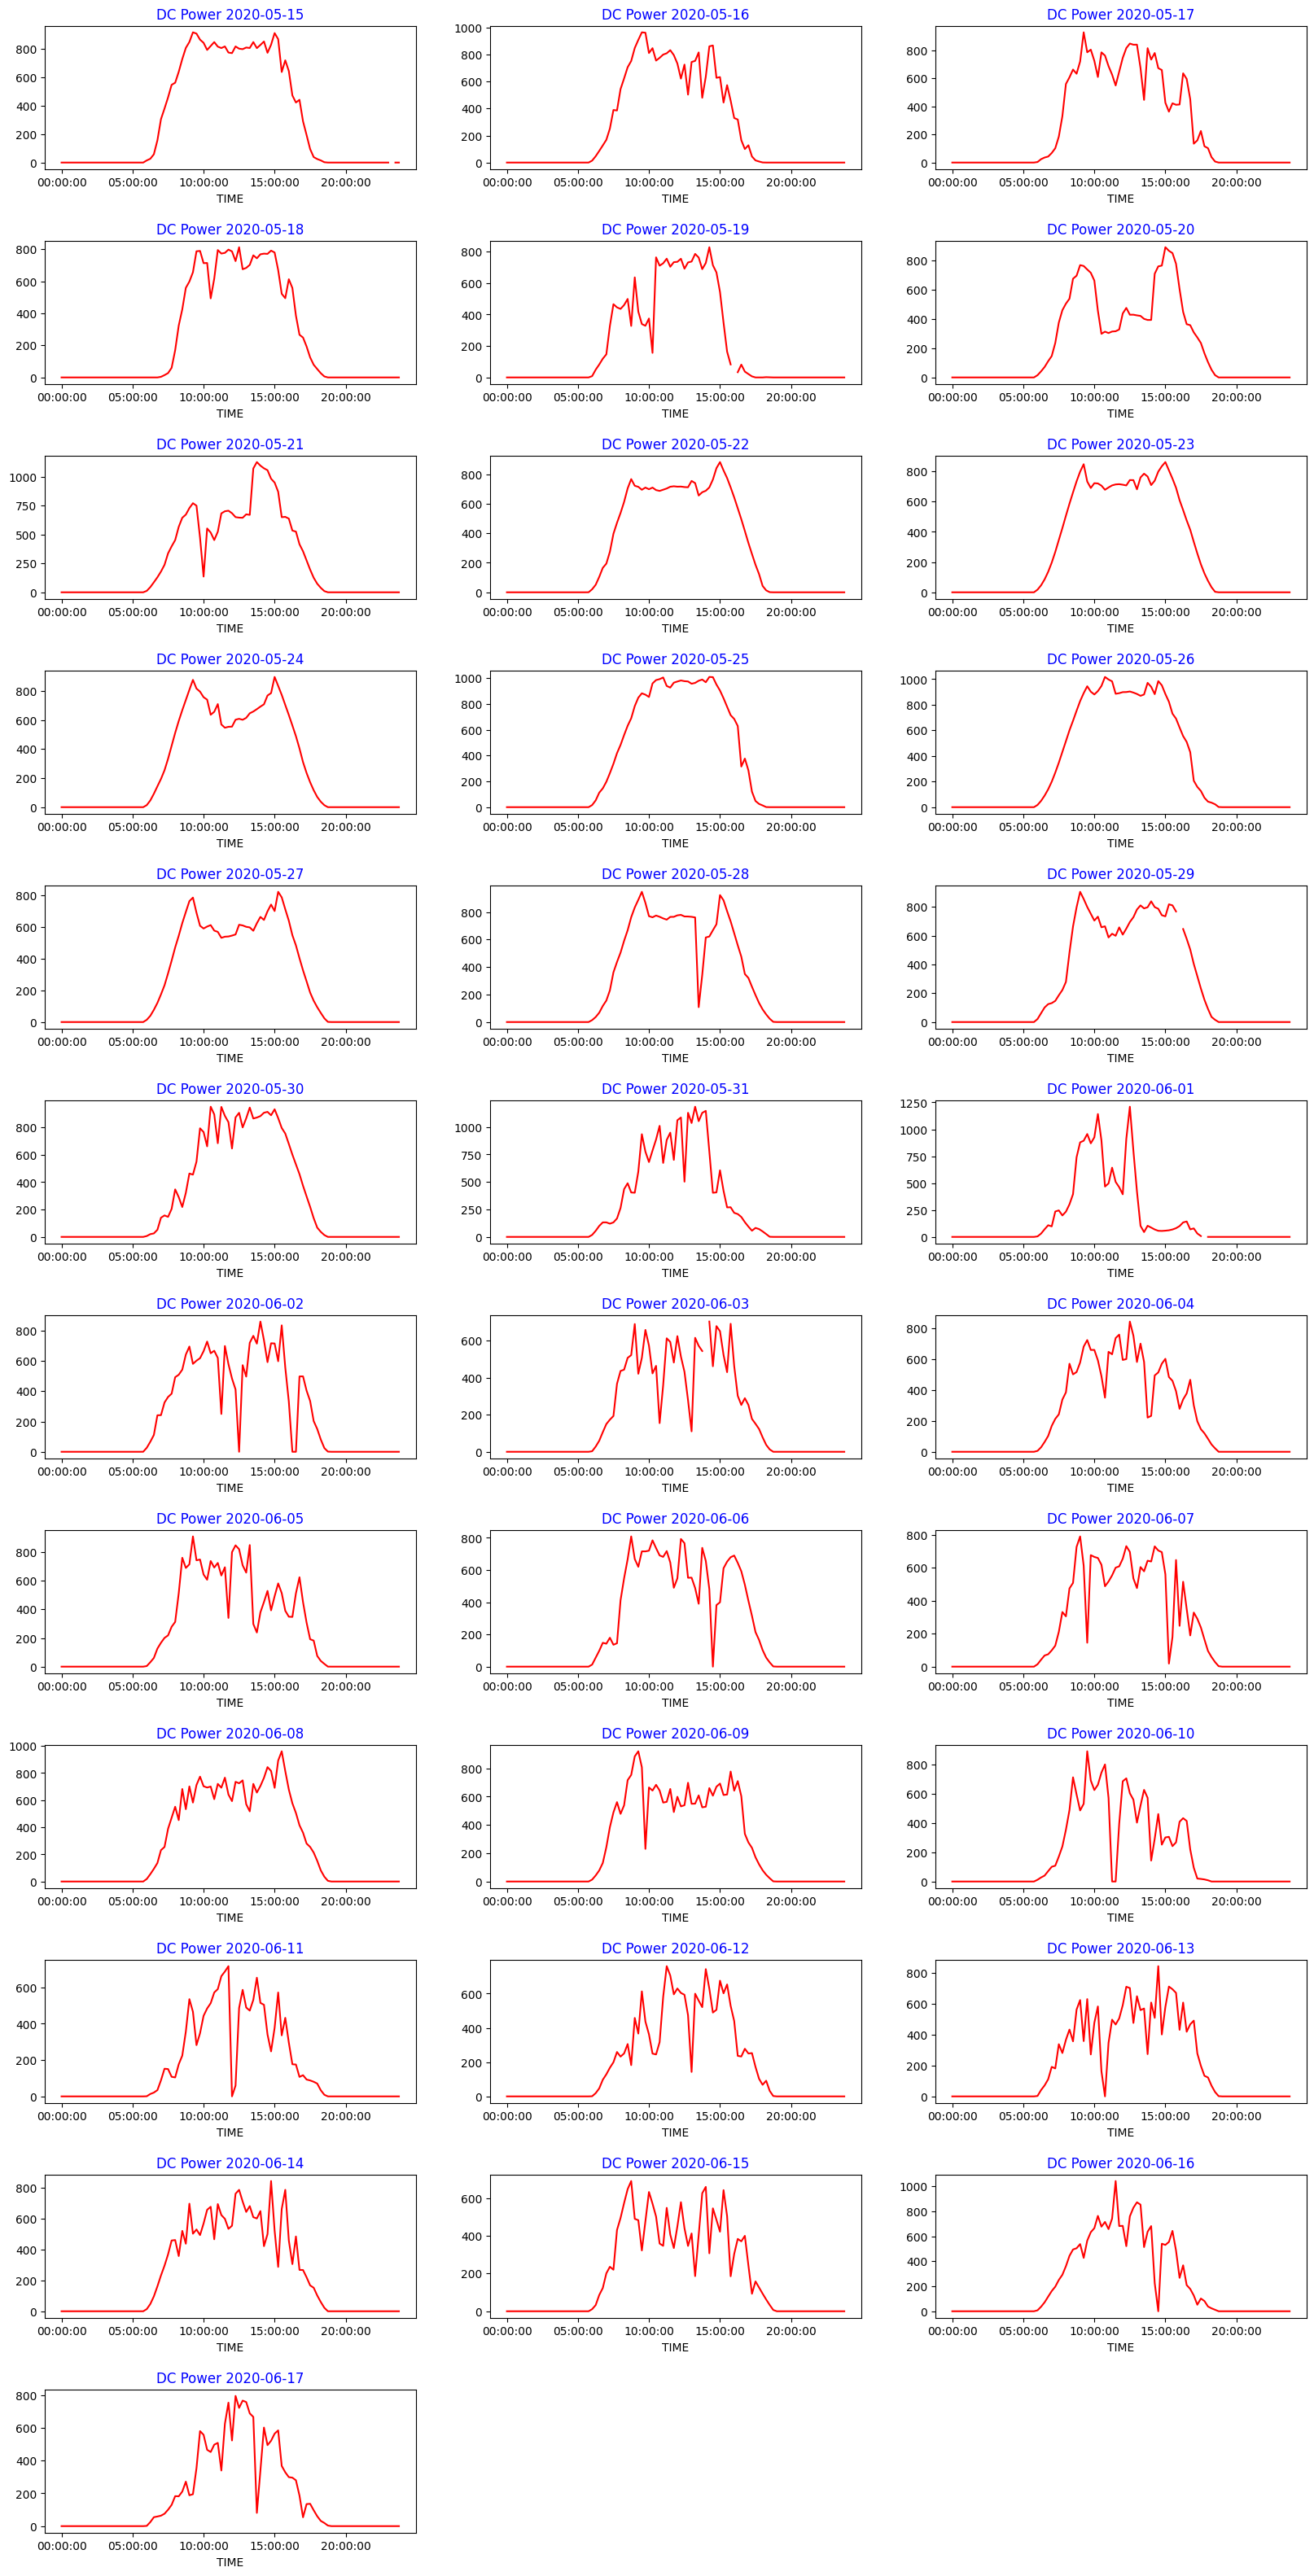

In [ ]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

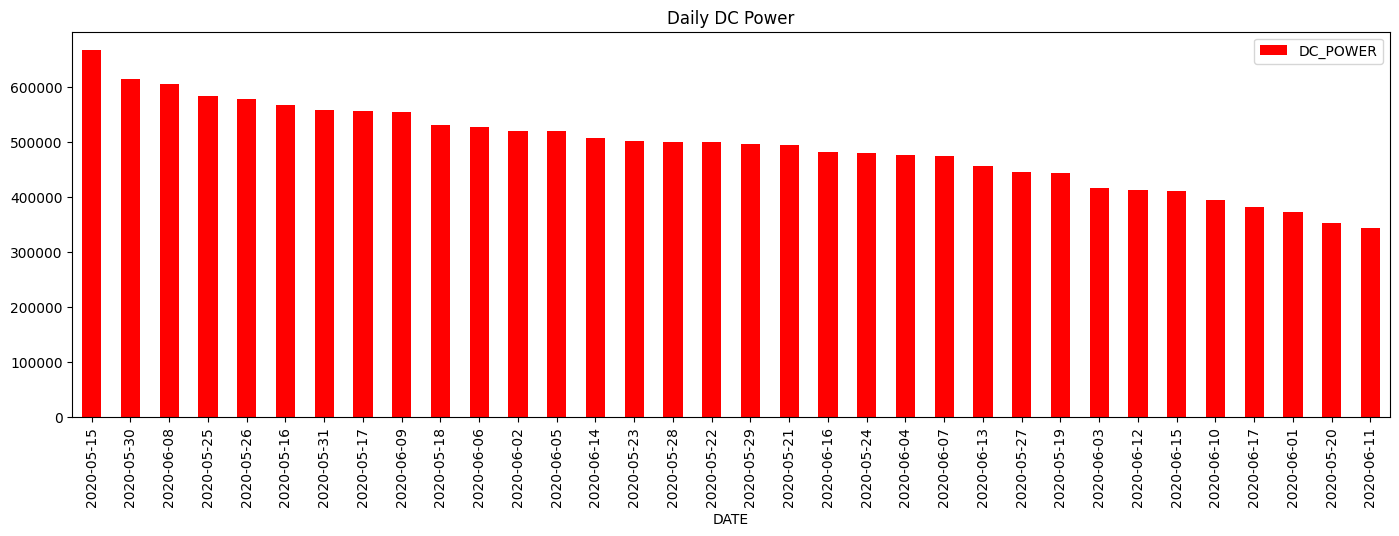

In [ ]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

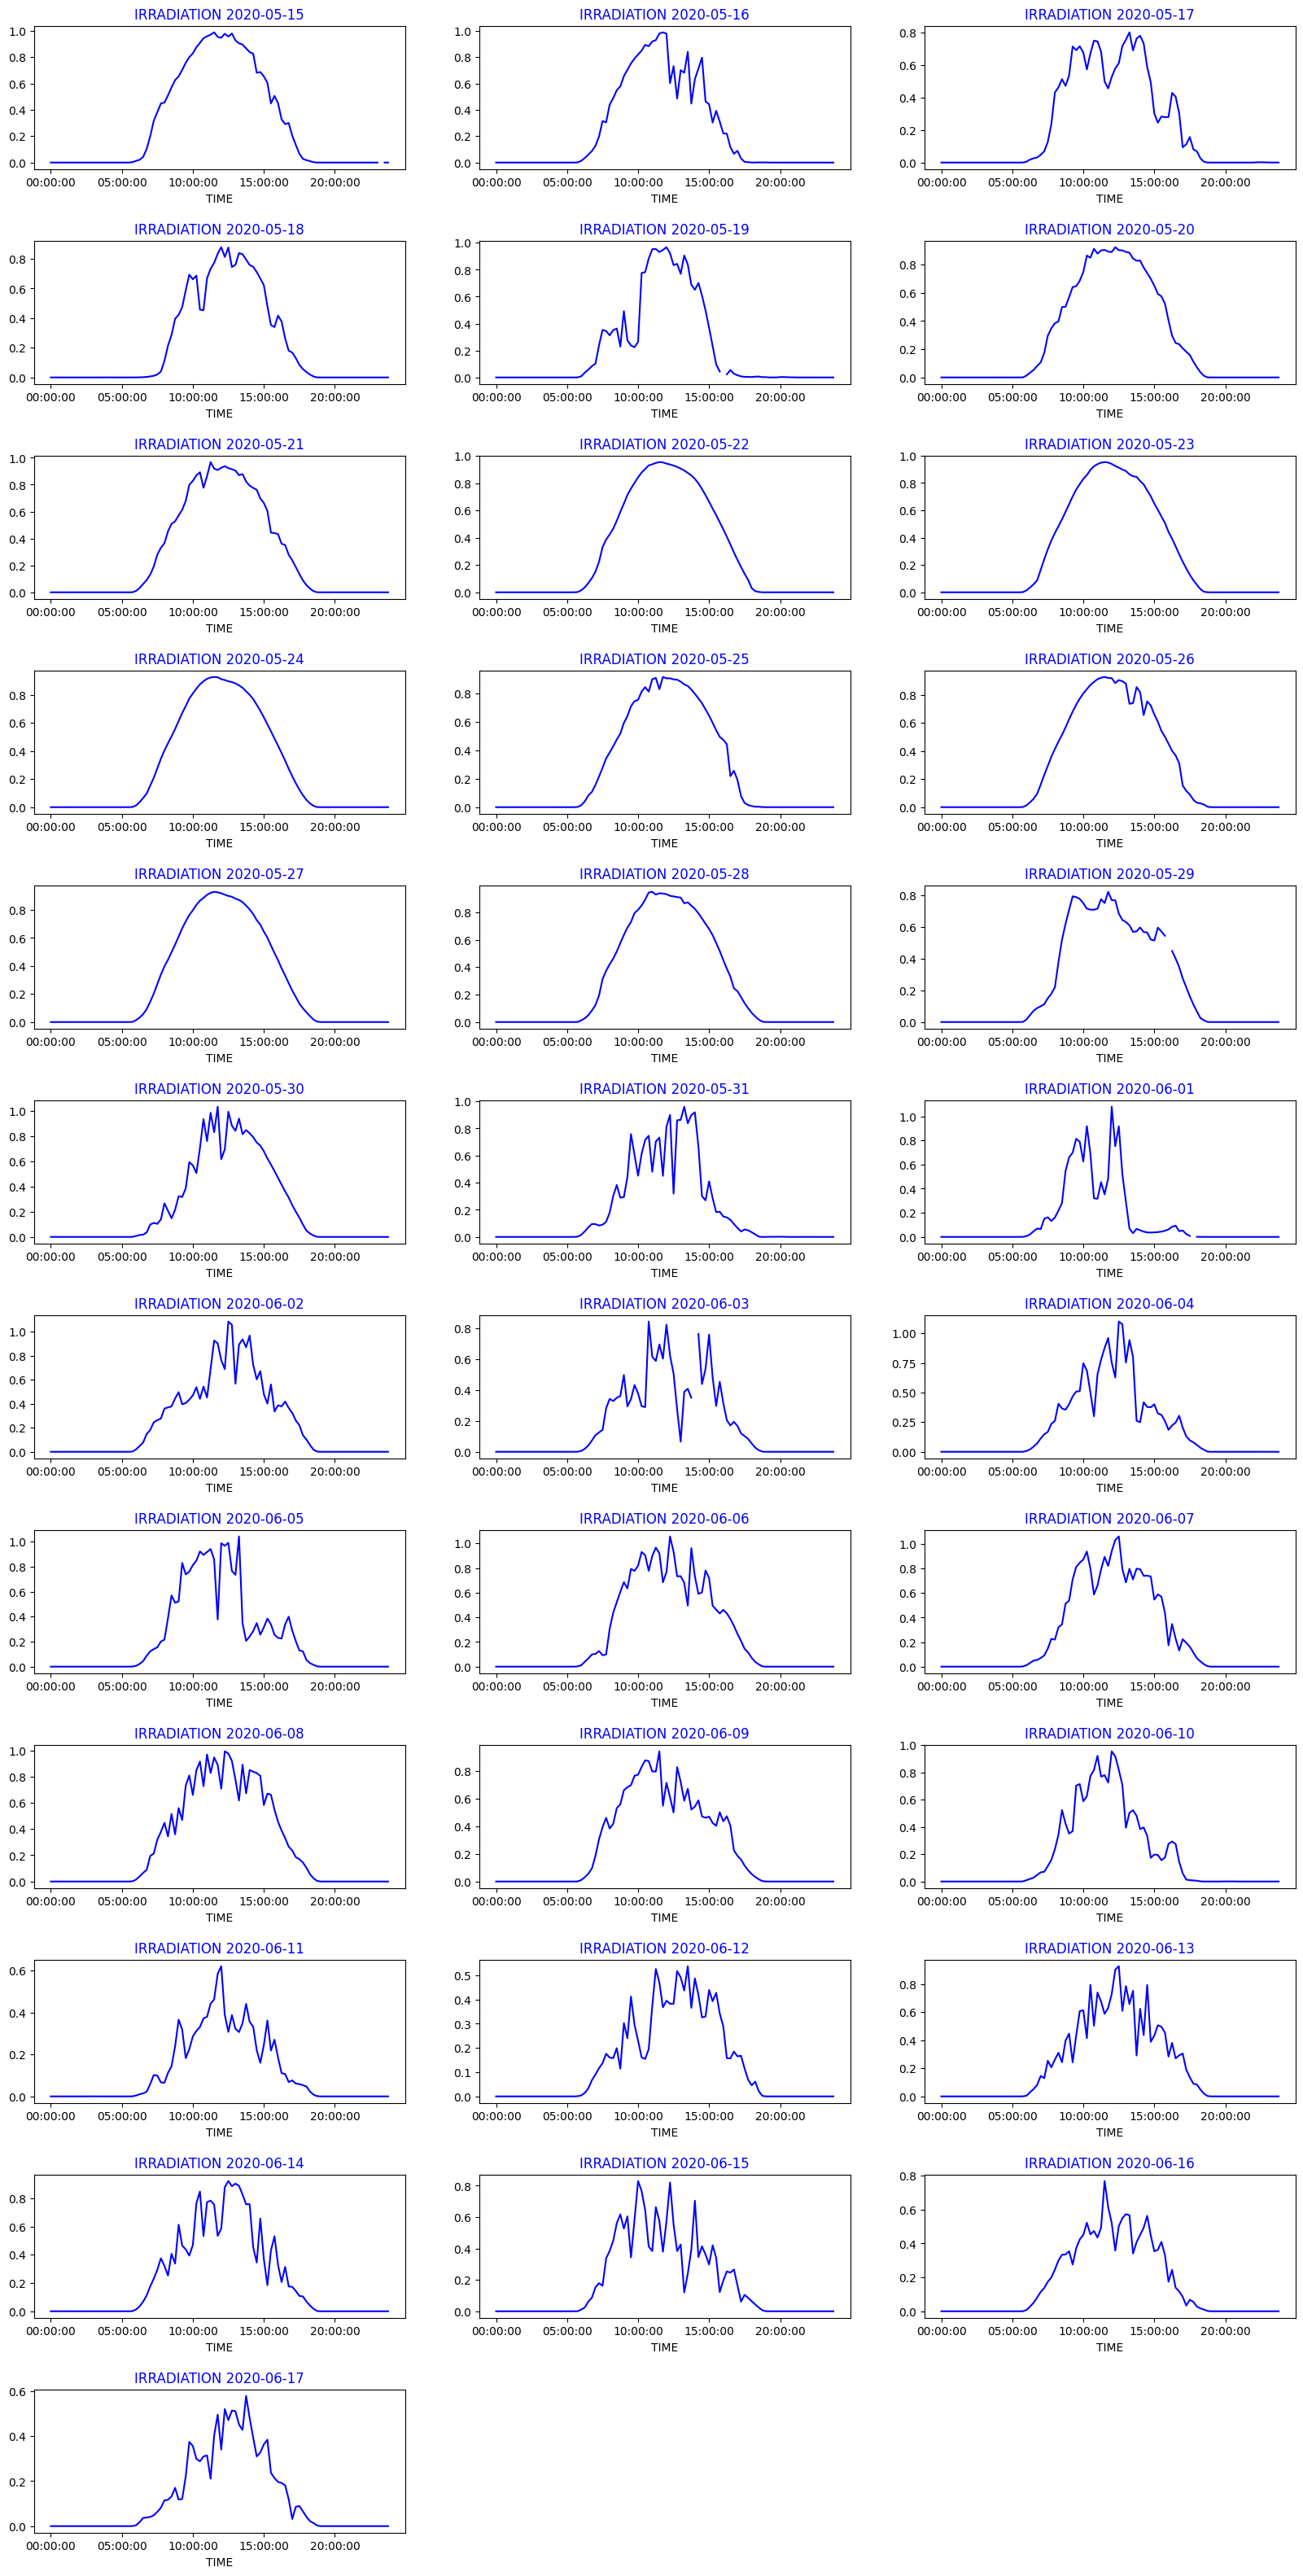

In [ ]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

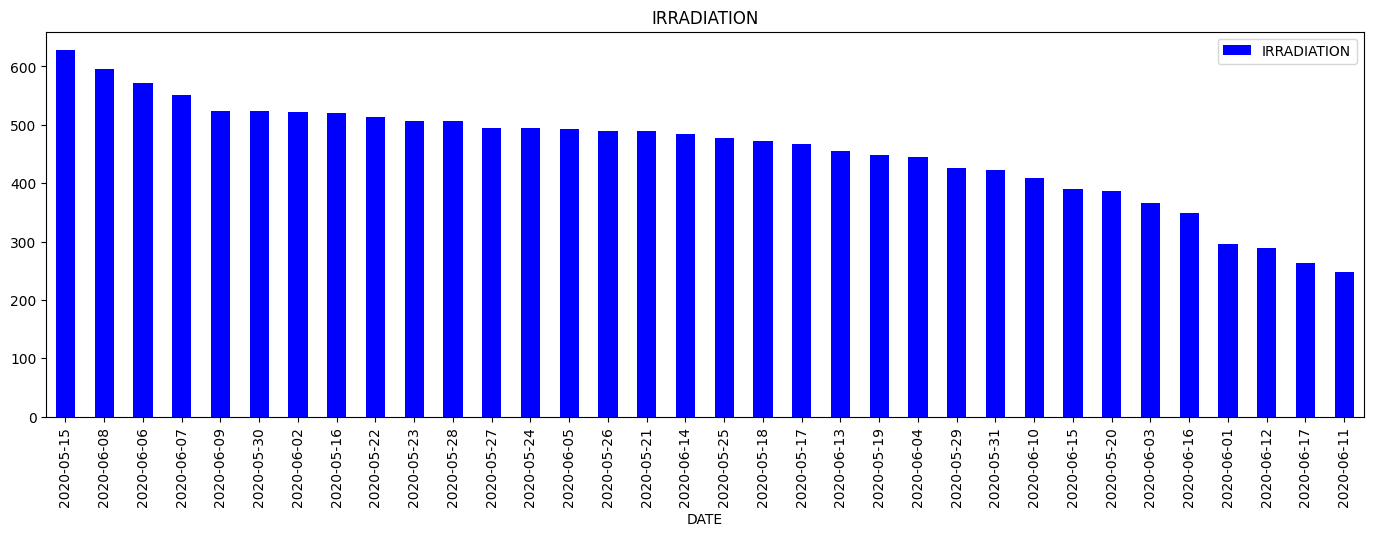

In [ ]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

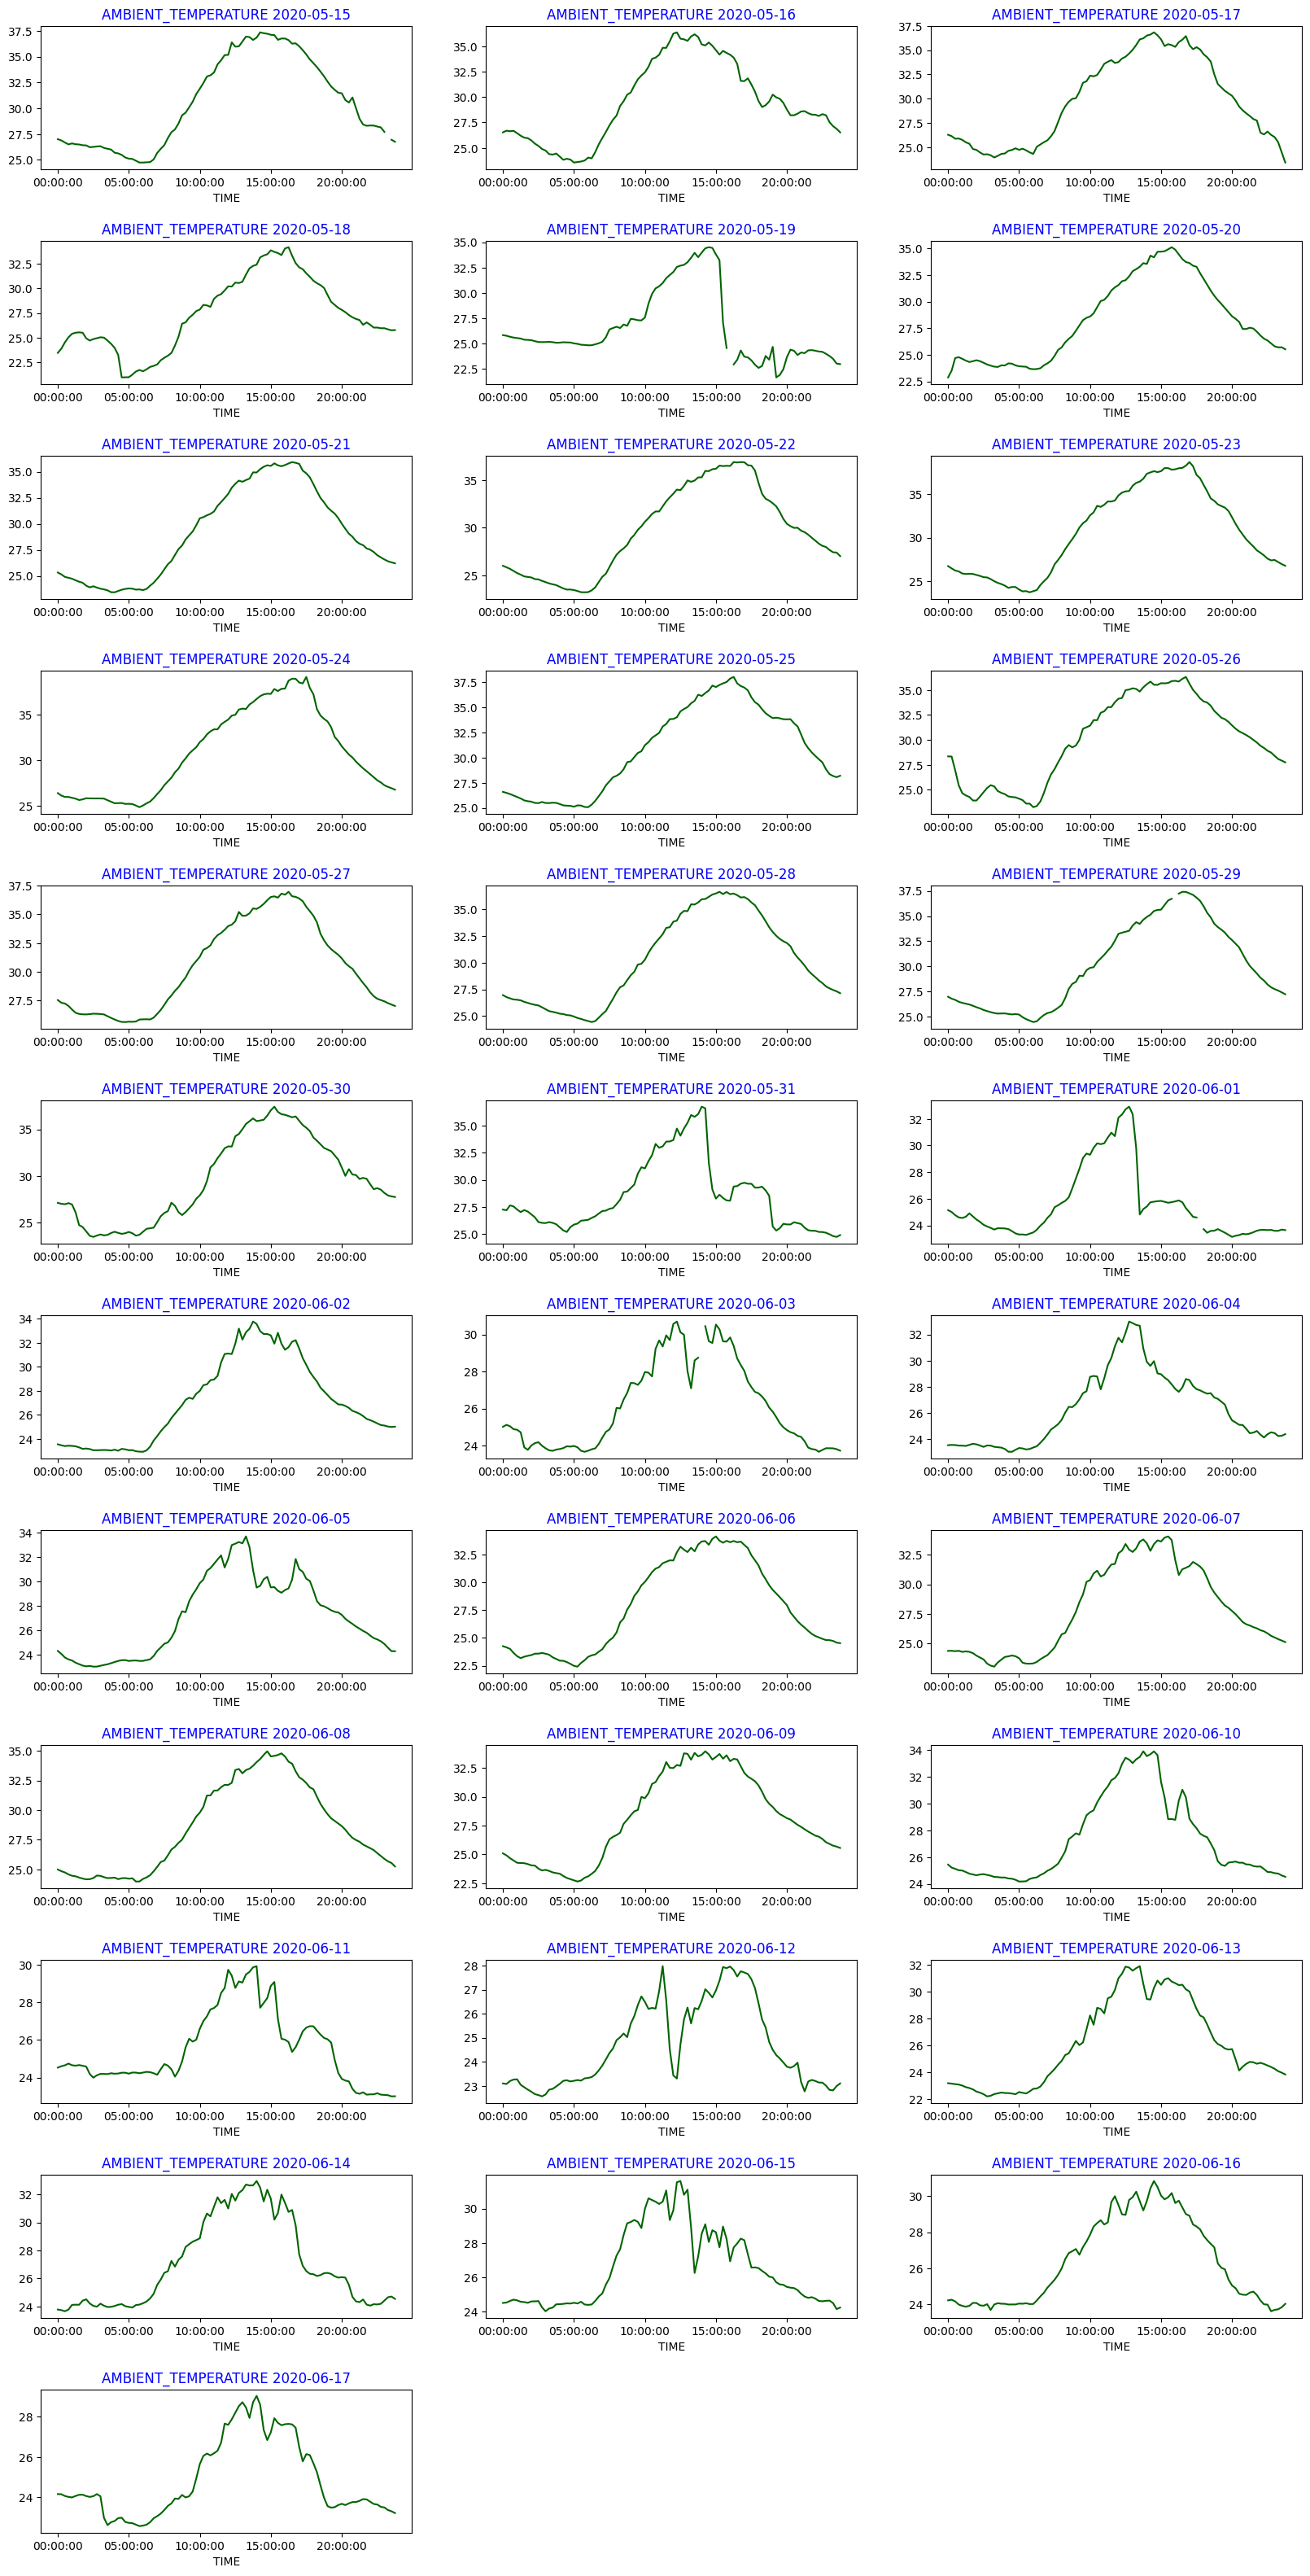

In [ ]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

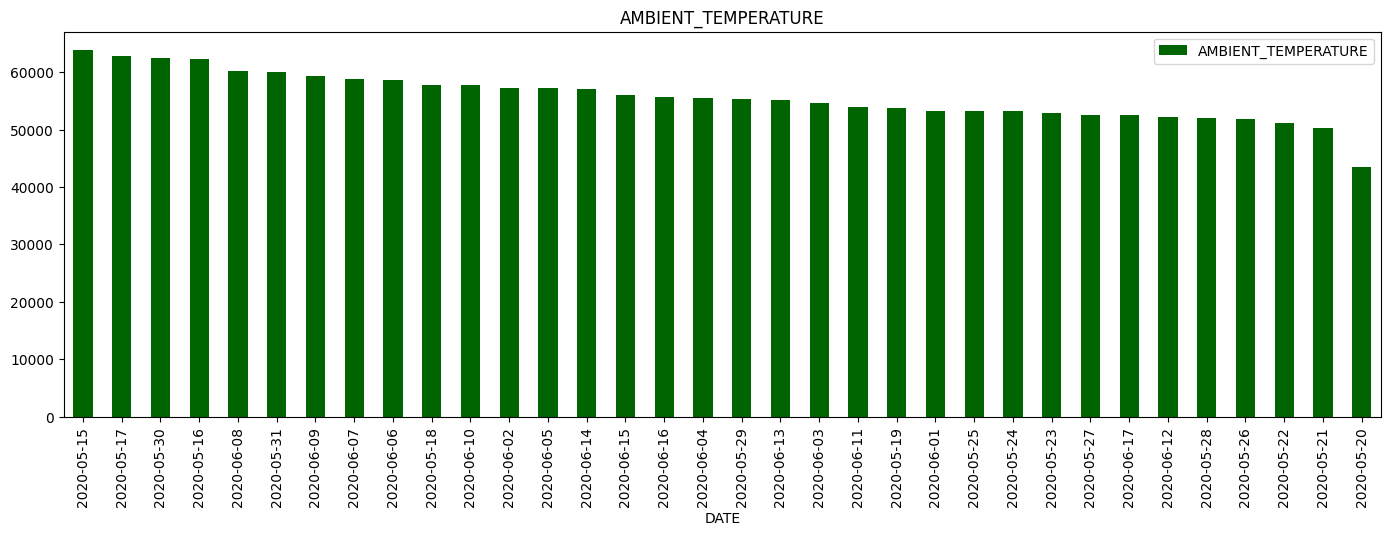

In [ ]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

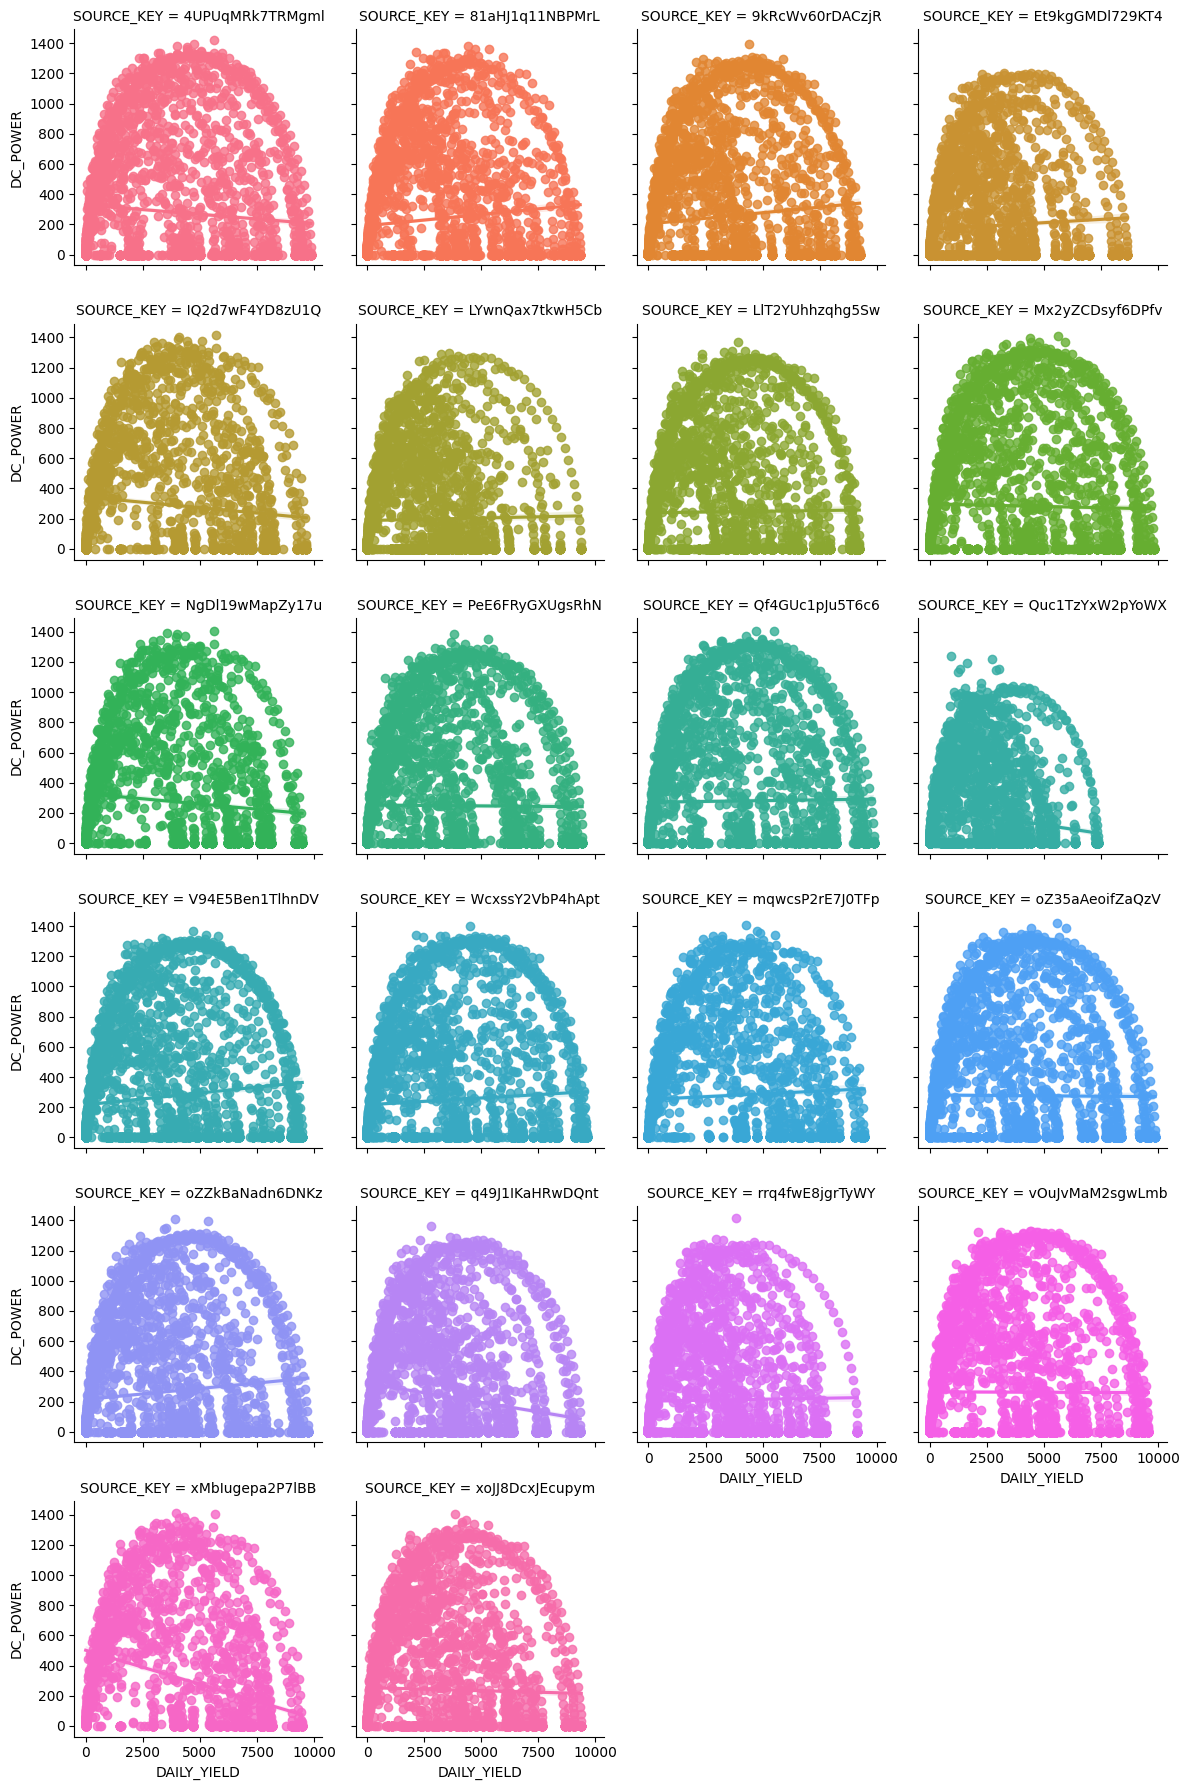

In [ ]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

In [10]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [ ]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [ ]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [ ]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

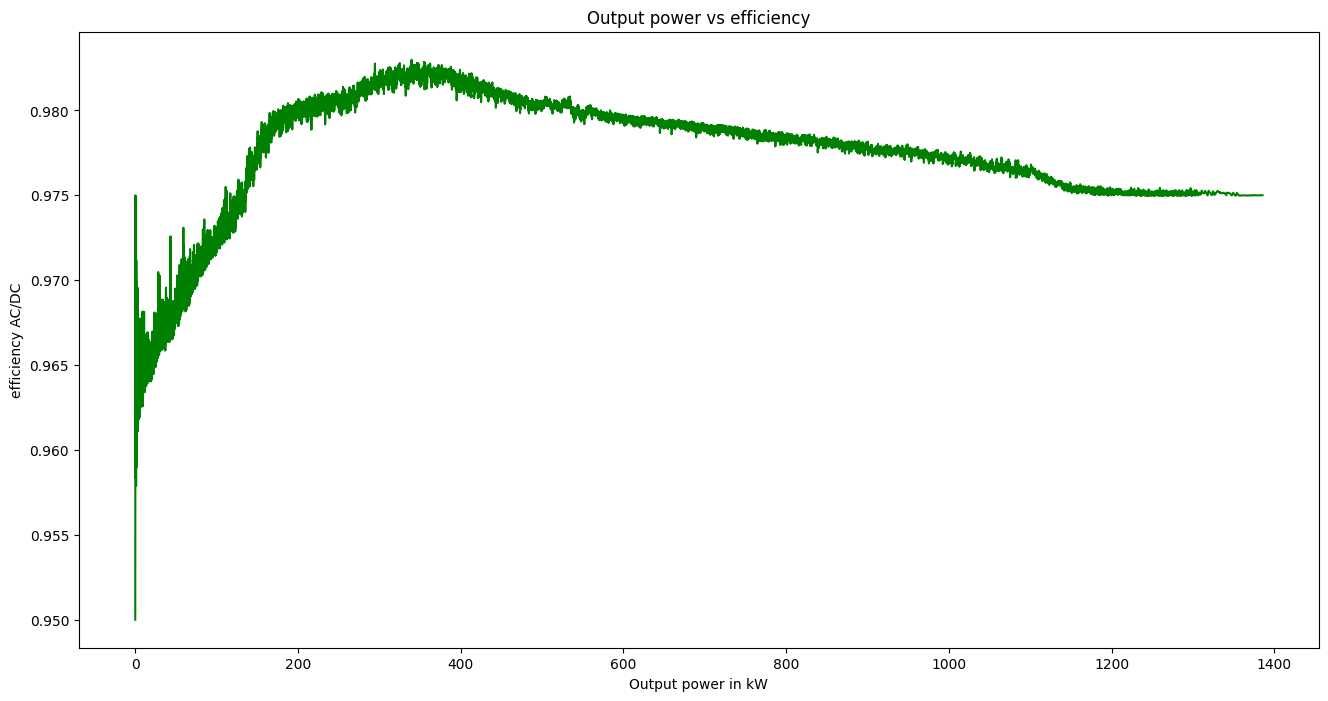

In [ ]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

In [11]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [12]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = lr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = lr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

NameError: ignored

In [16]:
prediction = rfr.predict(X_test)
print(prediction)

NameError: ignored

In [17]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

NameError: ignored

In [18]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

NameError: ignored

In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
48909,0.000000,0.000000,0.000000
7608,971.546667,971.162757,0.383910
43357,1232.666667,1232.613886,0.052781
46632,0.000000,0.000000,0.000000
11673,0.000000,0.000000,0.000000
31156,224.160000,224.168324,-0.008324
62404,761.146667,761.876338,-0.729671
38948,689.373333,689.448333,-0.075000
47915,0.000000,0.000000,0.000000
17478,0.000000,0.000000,0.000000
